### Exploratory Data Analysis

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_cust= pd.read_csv("customer_booking.csv",encoding='ISO-8859-1')

In [3]:
df_cust.shape

(50000, 14)

In [4]:
df_cust.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [42]:
sales=df_cust.groupby('sales_channel')['sales_channel'].count()
sales

,sales_channel
sales_channel,
Internet,44382
Mobile,5618


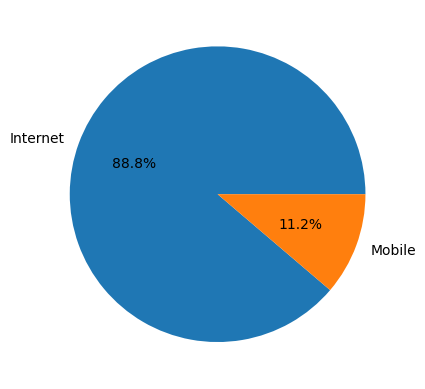

In [41]:
plt.pie(sales.values, labels = sales.index, autopct='%1.1f%%', shadow=False)
plt.show()

Most of the customers prefer using internet over mobile

In [27]:
trip=df_cust.groupby('trip_type')['trip_type'].count()
perc= (trip/df_cust['trip_type'].count())*100
perc

,trip_type
trip_type,
CircleTrip,0.232
OneWay,0.774
RoundTrip,98.994


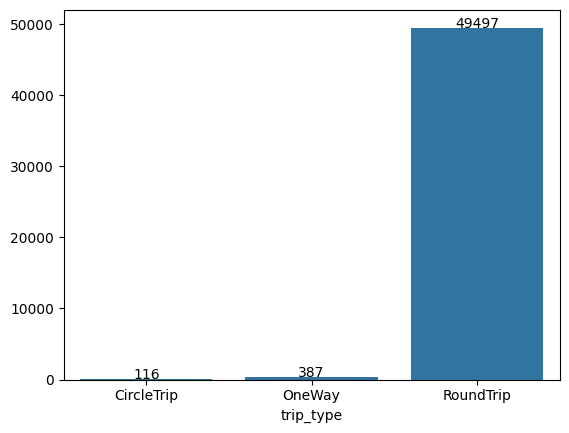

In [35]:
ax = sns.barplot(x=trip.index, y=trip.values)
for i, v in enumerate(trip.values):
   ax.text(i, v + 0.02, f'{v}', ha='center')

Round trip is mostly selected by the customers

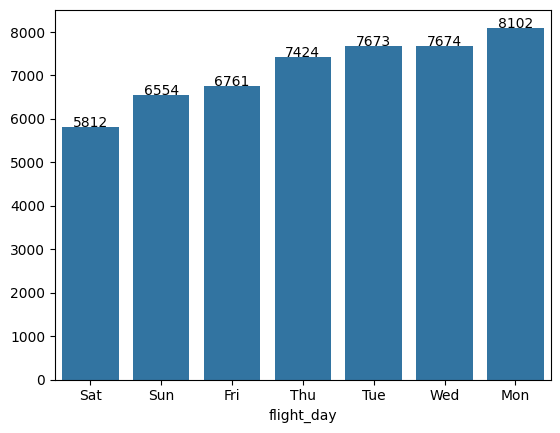

In [51]:
day = df_cust.groupby('flight_day')['flight_day'].count().sort_values()
ax= sns.barplot(x=day.index,y=day.values)
for i, v in enumerate(day.values):
 ax.text(i, v + 0.02, f'{v}', ha='center')

The highest flight bookings happens on Monday(weekday) and least on saturday(weekend)


In [101]:
route=df_cust.groupby('route')['route'].count().sort_values(ascending=False)
route.head(10)

,route
route,
AKLKUL,2680
PENTPE,924
MELSGN,842
ICNSIN,801
DMKKIX,744
ICNSYD,695
DMKPER,679
DPSICN,666
DMKOOL,655


Above are the Top 10 Routes

In [50]:
booking_origin=df_cust.groupby('booking_origin')['booking_origin'].count().sort_values(ascending=False)
booking_origin.head(10)

,booking_origin
booking_origin,
Australia,17872
Malaysia,7174
South Korea,4559
Japan,3885
China,3387
Indonesia,2369
Taiwan,2077
Thailand,2030
India,1270


Above are the 10 countries which has most flight bookings

In [73]:
duration_count = df_cust.groupby('flight_duration')['flight_duration'].count()
min_duration=min(duration_count)
min_index=duration_count.idxmin()
max_duration=max(duration_count)
max_index=duration_count.idxmax()
print("Minimum no of customers travelled-->",min_duration,"Duration-->",min_index)
print("Maximum of customers travelled-->",max_duration,"Duration-->",max_index)
print("Overall Minimum Daration-->",min(df_cust['flight_duration']))
print("Overall Maximum Daration-->",max(df_cust['flight_duration']))

Minimum no of customers travelled--> 37 Duration--> 9.5
Maximum of customers travelled--> 14520 Duration--> 8.83
Overall Minimum Daration--> 4.67
Overall Maximum Daration--> 9.5


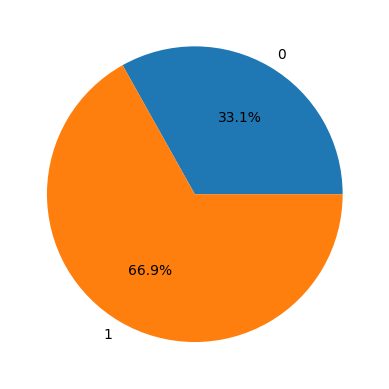

In [78]:
extra_bag=df_cust.groupby('wants_extra_baggage')['wants_extra_baggage'].count()
plt.pie(extra_bag.values,labels=extra_bag.index,autopct='%1.1f%%')
plt.show()

Nearly 67% of customers opt for extra baggage in flights on the whole

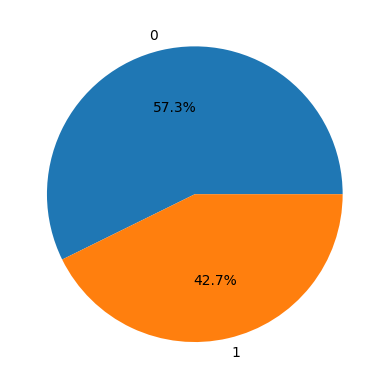

In [79]:
meals=df_cust.groupby('wants_in_flight_meals')['wants_in_flight_meals'].count()
plt.pie(meals.values,labels=meals.index,autopct='%1.1f%%')
plt.show()

Nearly 57% of customers dont opt for the food provided in flights on the whole

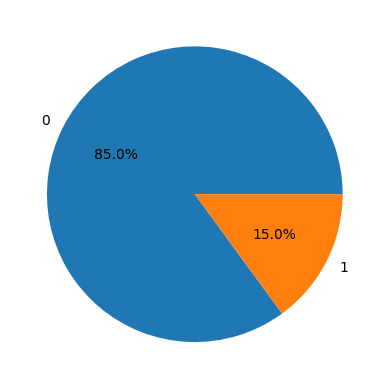

In [87]:
booking_complete=df_cust.groupby('booking_complete')['booking_complete'].count()
plt.pie(booking_complete.values,labels=booking_complete.index,autopct='%1.1f%%')
plt.show()

85% of the bookings goes incomplete


### Feature Selection

In [107]:
X= df_cust.drop('booking_complete',axis=1)
y= df_cust.booking_complete

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()


In [109]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
#Top 5 Features
mi_scores.head(5)

,MI Scores
route,0.054014
booking_origin,0.046602
flight_duration,0.017571
wants_extra_baggage,0.009959
length_of_stay,0.008331


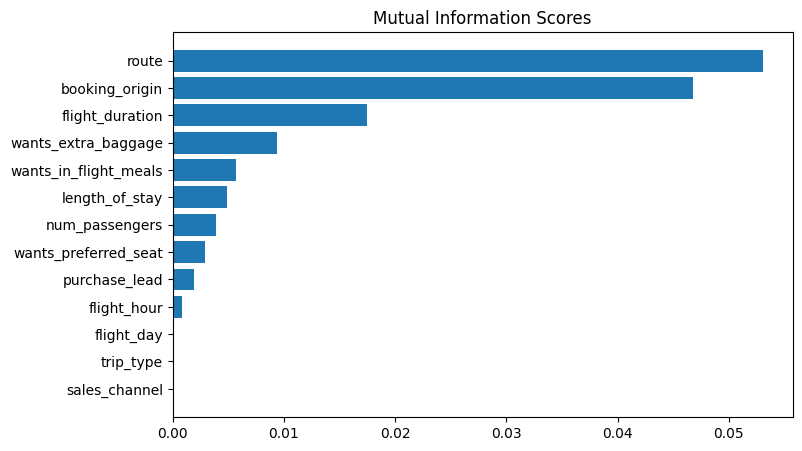

In [104]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)


### Machine Learning

In [97]:
from sklearn.model_selection import train_test_split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)

In [98]:
from sklearn.preprocessing import MinMaxScaler
def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

In [114]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X= df_cust[features]

#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df_cust.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  83.36
AUC score:  0.5657818407546988
